In [1]:
%%capture
%pip install yfinance
%pip install pandas
%pip install matplotlib
%pip install plotly
%pip install numpy
%pip install statsmodels
%pip install xgboost
%pip install seaborn

In [18]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

***CURRENTLY OWNED STOCKS***

In [12]:
amazon = yf.Ticker("AMZN")
rivian = yf.Ticker("RIVN")
nvidia = yf.Ticker("NVDA")
oatly = yf.Ticker("OTLY")
meta = yf.Ticker("META")

In [27]:
amazon_history = amazon.history(period = "max")
rivian_history = rivian.history(period = "max")
nvidia_history = nvidia.history(period = "max")
oatly_history = oatly.history(period = "max")
meta_history = meta.history(period = "max")

#5 Year Data
amazon_history5y = amazon.history(period = "5y")
rivian_history5y = rivian.history(period = "5y")
nvidia_history5y = nvidia.history(period = "5y")
oatly_history5y = oatly.history(period = "5y")
meta_history5y = meta.history(period = "5y")

#nvidia_history = nvidia_history.reset_index()


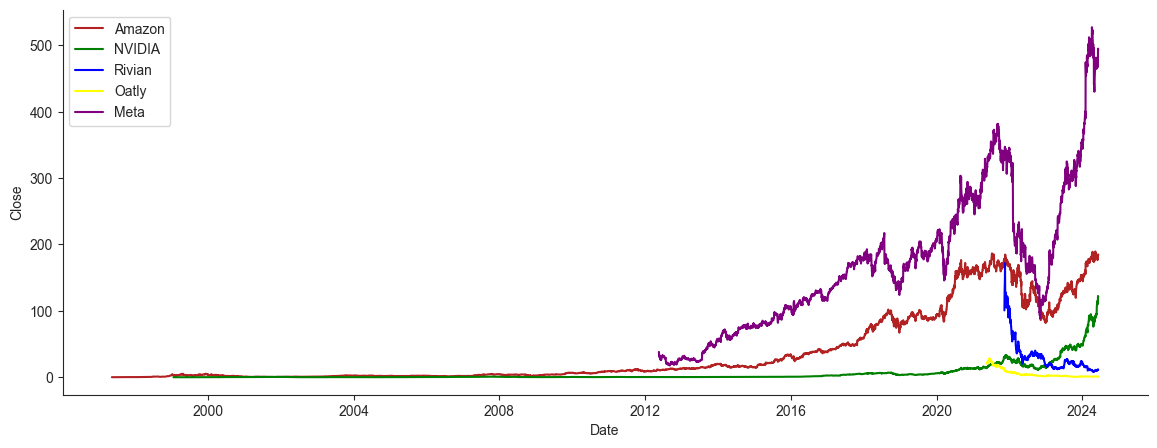

In [28]:
plt.figure(figsize = (14,5))
sns.set_style("ticks")
sns.lineplot(data = amazon_history, x = "Date", y = "Close", color = "firebrick", label = "Amazon")
sns.lineplot(data = nvidia_history, x = "Date", y = "Close", color = "green", label = "NVIDIA")
sns.lineplot(data = rivian_history, x = "Date", y = "Close", color = "blue", label = "Rivian")
sns.lineplot(data = oatly_history, x = "Date", y = "Close", color = "yellow", label = "Oatly")
sns.lineplot(data = meta_history, x = "Date", y = "Close", color = "purple", label = "Meta")
sns.despine()

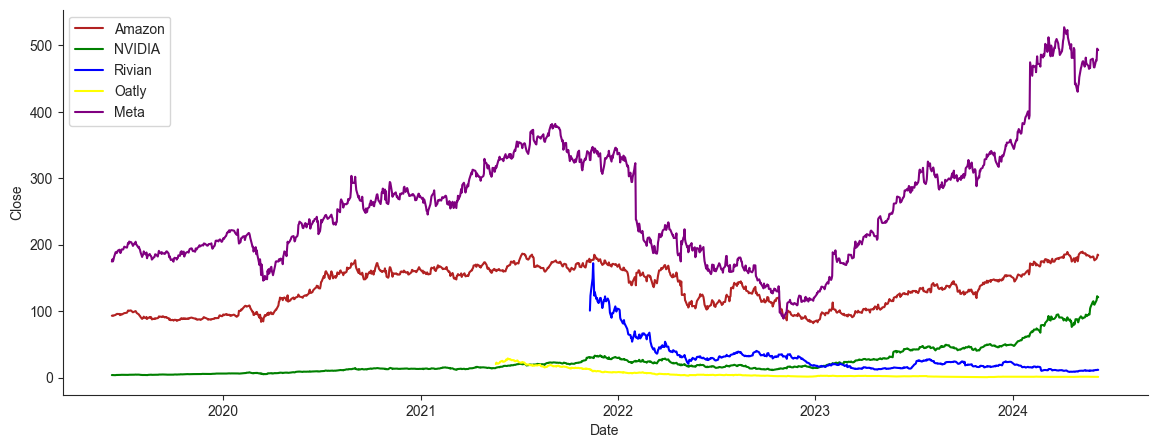

In [29]:
plt.figure(figsize = (14,5))
sns.set_style("ticks")
sns.lineplot(data = amazon_history5y, x = "Date", y = "Close", color = "firebrick", label = "Amazon")
sns.lineplot(data = nvidia_history5y, x = "Date", y = "Close", color = "green", label = "NVIDIA")
sns.lineplot(data = rivian_history5y, x = "Date", y = "Close", color = "blue", label = "Rivian")
sns.lineplot(data = oatly_history5y, x = "Date", y = "Close", color = "yellow", label = "Oatly")
sns.lineplot(data = meta_history5y, x = "Date", y = "Close", color = "purple", label = "Meta")
sns.despine()

In [40]:
nvidia.recommendations
amazon.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,15,28,3,1,0
1,-1m,19,39,2,0,0
2,-2m,18,38,2,0,0
3,-3m,18,37,1,0,0
